## Applied Data Science Capstone- The Battle of Neighbourhoods

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighbourhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.

 ### 1) Introduction/Business Problem:

The idea of this project is to help people who planning to open a new chinese restaurant in Toronto. This will help them in choosing the right location by providing data about the income and population of each neighbourhood. This project will also give a description of the competitors (eg: chinese restaurants) already present on the same regions.

 ### 2) Location Data

Now lets look at the population, average income Neighborhood with Toronto's Neighborhoods shapefile, average spending on food per household and Foursquare API to collect competitors in the same neighborhoods. 
To give you a brief idea of Toronto, you can find more details using the links below:

**_Toronto's Neighbourhoods data is readily available at this website:
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a_**

**_Toronto's average spending on food per household: 
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110012501_**

 ### 3) Getting data ready

Let's  start off with importing the necessary dependencies and files we will required.

In [188]:
# library to handle data in a vectorized manner
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd # library for data analysis

**_Now lets get Toronto's neighbourhood data:_**

In [195]:
# Toronto Open Data Catalogue - Neighbourhood Profiles 2016 (CSV)
# https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a
url1 = 'https://raw.githubusercontent.com/munyee63/Coursera_Capstone/master/toronto%20geo.csv'
df = pd.read_csv(url1, error_bad_lines=False)
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [196]:
url = 'https://raw.githubusercontent.com/munyee63/Coursera_Capstone/master/toronto_test.csv'
df_income = pd.read_csv(url, error_bad_lines=False)

**_Then lets import the income data for the neighbourhood_**

In [197]:
df_income.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [198]:
df_income.dropna() # drop NaN from the data

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77
5,M1J,Scarborough,139.0,16724.0,5395.0,3.10,5920.0,105.0,180.0,305.0,330.0,325.0,345.0,370.0,345.0,325.0,355.0,570.0,420.0,355.0,300.0,220.0,1080.0,410.0,240.0,230.0,195.0,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13
6,M1K,Scarborough,125.0,13641.0,7031.0,1.94,5165.0,120.0,95.0,205.0,250.0,240.0,295.0,295.0,295.0,340.0,295.0,465.0,440.0,400.0,280.0,260.0,900.0,405.0,250.0,185.0,70.0,27.34,4.40,12.50,17.59,1.65,1.72,0.99,1.28,0.26,0.07,26.83
7,M1L,Scarborough,302.0,56512.0,26604.0,10.30,20800.0,480.0,580.0,1000.0,1160.0,1095.0,1135.0,1155.0,1110.0,1140.0,1055.0,1790.0,1545.0,1270.0,1095.0,975.0,4250.0,1735.0,1005.0,1045.0,465.0,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57
8,M1M,Scarborough,385.0,55834.0,14094.0,13.83,20390.0,305.0,420.0,780.0,1120.0,1100.0,1105.0,1075.0,1065.0,1060.0,980.0,1755.0,1430.0,1330.0,1125.0,910.0,4825.0,1760.0,1150.0,1155.0,745.0,23.88,4.92,12.26,11.01,1.36,0.84,0.88,1.50,0.27,0.43,36.61
9,M1N,Scarborough,122.0,22291.0,3765.0,5.92,9200.0,165.0,290.0,320.0,335.0,405.0,330.0,315.0,340.0,330.0,310.0,650.0,595.0,525.0,475.0,465.0,3345.0,935.0,670.0,825.0,930.0,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51


### 4) Combining Dataframes

In [201]:
PostCode = []
Borough=[]
Neighborhood=[]
Population=[]
Longitude = []
Latitude = []
P_density = []
Area = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
P9 = []
P10 = []
P11 = []
P12 = []
P13 = []
P14 = []
P15 = []
P16 = []
P17 = []
P18 = []
P19 = []
P20 = []
South_Asian = []
Chinese = []
Black = []
Filipino = []
Latin_American = []
Arab = []
Southeast_Asian =[]
West_Asian = []
Korean = []
Japanese = []
White = []
SP = []

for i in df ['PostalCode']:
    if df_income['PostalCode'].isin([i]).any():
        PostCode.append(i)
        loc = df.index[df['PostalCode']==i]
        Borough.append(df['Borough'][loc].values[0])
        Neighborhood.append(df['Neighborhood'][loc].values[0])
        Latitude.append(df['Latitude'][loc].values[0])
        Longitude.append(df['Longitude'][loc].values[0])
        loc = df_income.index[df_income['PostalCode']==i]
        Population.append(df_income['Population, 2016'][loc].values[0])
        P_density.append(df_income['Population density per square kilometre'][loc].values[0])
        Area.append(df_income['Land area in square kilometres'][loc].values[0])
        p1=(df_income['  Under $5,000'][loc].values[0])
        p2=(df_income['  $5,000 to $9,999'][loc].values[0])
        p3=(df_income['  $10,000 to $14,999'][loc].values[0])
        p4=(df_income['  $15,000 to $19,999'][loc].values[0])
        p5=(df_income['  $20,000 to $24,999'][loc].values[0])
        p6=(df_income['  $25,000 to $29,999'][loc].values[0])
        p7=(df_income['  $30,000 to $34,999'][loc].values[0])
        p8=(df_income['  $35,000 to $39,999'][loc].values[0])
        p9=(df_income['  $40,000 to $44,999'][loc].values[0])
        p10=(df_income['  $45,000 to $49,999'][loc].values[0])
        p11=(df_income['  $50,000 to $59,999'][loc].values[0])
        p12=(df_income['  $60,000 to $69,999'][loc].values[0])
        p13=(df_income['  $70,000 to $79,999'][loc].values[0])
        p14=(df_income['  $80,000 to $89,999'][loc].values[0])
        p15=(df_income['  $90,000 to $99,999'][loc].values[0])
        p16=(df_income['  $100,000 and over'][loc].values[0])
        p17=(df_income['    $100,000 to $124,999'][loc].values[0])
        p18=(df_income['    $125,000 to $149,999'][loc].values[0])
        p19=(df_income['    $150,000 to $199,999'][loc].values[0])
        p20=(df_income['    $200,000 and over'][loc].values[0])
        South_Asian.append(df_income['    South Asian'][loc].values[0])
        Chinese.append(df_income['    Chinese'][loc].values[0])
        Black.append(df_income['    Black'][loc].values[0])
        Filipino.append(df_income['    Filipino'][loc].values[0])
        Latin_American.append(df_income['    Latin American'][loc].values[0])
        Arab.append(df_income['    Arab'][loc].values[0])
        Southeast_Asian.append(df_income['    Southeast Asian'][loc].values[0])
        West_Asian.append(df_income['    West Asian'][loc].values[0])
        Korean.append(df_income['    Korean'][loc].values[0])
        Japanese.append(df_income['    Japanese'][loc].values[0])
        White.append(df_income['White'][loc].values[0])
        sp = 5000*p1+7500*p2+12500*p3+17500*p4+22500*p5+27500*p6+32500*p7+37500*p8+42500*p9+\
        47500*p10+55000*p11+65000*p12+75000*p13+85000*p14+95000*p15+112500*p17+137500*p18+\
        175000*p19+200000*p20
        P1.append(p1)
        P2.append(p2)
        P3.append(p3)
        P4.append(p4)
        P5.append(p5)
        P6.append(p6)
        P7.append(p7)
        P8.append(p8)
        P9.append(p9)
        P10.append(p10)
        P11.append(p11)
        P12.append(p12)
        P13.append(p13)
        P14.append(p14)
        P15.append(p15)
        P16.append(p16)
        P17.append(p17)
        P18.append(p18)
        P19.append(p19)
        P20.append(p20)
        SP.append(sp)

### Create a new DataFrame by combining the two DataFrames

In [205]:
df_data = pd.DataFrame({'PostCode':PostCode,'Borough':Borough,'Neighborhood':Neighborhood,'Latitude':Latitude,
                        'Longitude':Longitude,'Population':Population,'Density':P_density,'Area':Area,
                       '< 5k':P1,'5k - 10k':P2,'10k - 15k':P3,'15k - 20k':P4,'20k - 25k':P5,'25k - 30k':P6,
                        '30k - 35k':P7,'35k - 40k':P8,'40k - 45k':P9,'45k - 50k':P10,'50k - 60k':P11,
                        '60k - 70k':P12,'70k - 80k':P13,'80k - 90k':P14,'90k - 100k':P15,'100k - 125k':P17,
                        '125k - 150k':P18,'150k - 200k':P19,'> 200k':P20, 'South Asian':South_Asian,
                       'Chinese':Chinese,'Black':Black,'Filipino':Filipino,'Latin American':Latin_American,
                       'Arab':Arab,'Southeast Asian':Southeast_Asian,'West Asian':West_Asian,'Korean':Korean,
                       'Japanese':Japanese,'White':White,'Spending Power':SP})

In [330]:
df_data["Spending Power"] = (df_data["Spending Power"]-df_data["Spending Power"].mean())/df_data["Spending Power"].std()
df_data.head(100)

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.061812
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.693676
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.120335
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
5,M3B,North York,Don Mills North,43.745906,-79.352188,27695.0,2775.0,9.98,265.0,155.0,235.0,400.0,395.0,445.0,405.0,470.0,460.0,400.0,930.0,885.0,780.0,655.0,605.0,1135.0,780.0,935.0,1750.0,10.20,16.72,3.50,4.10,1.26,1.99,0.40,2.73,2.02,0.76,51.60,0.169411
6,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,31216.0,11618.0,6.54,255.0,275.0,530.0,710.0,670.0,565.0,595.0,535.0,540.0,475.0,890.0,775.0,645.0,620.0,565.0,1145.0,845.0,1180.0,1125.0,7.06,5.79,8.09,3.94,1.47,0.58,0.57,1.29,0.47,0.79,66.93,0.085703
7,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,21210.0,9511.0,2.23,155.0,180.0,255.0,620.0,505.0,410.0,470.0,435.0,440.0,355.0,615.0,580.0,520.0,430.0,385.0,780.0,520.0,600.0,450.0,2.95,4.15,12.82,9.01,6.25,0.52,1.82,0.68,0.57,0.59,56.15,-0.475950
8,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,105450.0,14937.0,26.38,2540.0,970.0,1255.0,1710.0,1535.0,1730.0,1555.0,1630.0,1575.0,1615.0,3220.0,3060.0,2825.0,2625.0,2315.0,4420.0,2955.0,3385.0,4540.0,6.68,14.15,3.55,2.10,2.05,1.45,0.85,4.62,5.36,0.75,55.89,3.748670
9,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399


### 4)  Using Foursquare Location Data 

##### -  locate and have an overview of toronto's map location
##### - to find out the number of chinese restaurants in Toronto
Foursquare data is very comprehensive and it powers location data for many popular applications. For this business problem I have used, the Foursquare API can help to retrieve information about the number of chinese restaurants around Toronto's districts which have post code starting with M. The call returns a JSON file and we need to turn that into a data-frame. 

## 5) Locate coordinates of Toronto

In [40]:
!conda install -c conda-forge geopy --yes 
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 

from geopy.geocoders import Nominatim 
GeoLocator = Nominatim
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes       

import folium 
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [41]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of Toronto Canada are 43.653963, -79.387207.


In [269]:
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(Toronto_map)

Toronto_map

In [270]:
CLIENT_ID = 'FXEYNHRJOFDACV4FOAQHYBDCGPX20KYHTPJFCCGHJI0JW10H' 
CLIENT_SECRET = 'W330DBT11XATMTZJZS0441EHZ4TL24OXGZGQ0ZQUASAM4SZE' 
VERSION = '20180605' # Foursquare API version


In [273]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [275]:
LIMIT = 200
toronto_venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Cen

In [276]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,Parkwoods,43.753259,-79.329656,LA Fitness,43.747665,-79.347077,Gym / Fitness Center
3,Parkwoods,43.753259,-79.329656,Graydon Hall Manor,43.763923,-79.342961,Event Space
4,Parkwoods,43.753259,-79.329656,LCBO,43.757774,-79.314257,Liquor Store


In [277]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,100,100,100,100,100,100
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",95,95,95,95,95,95
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",45,45,45,45,45,45
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Downsview North, Wilson Heights",54,54,54,54,54,54
Bayview Village,49,49,49,49,49,49
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100
"Birch Cliff, Cliffside West",50,50,50,50,50,50


In [278]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 325 uniques categories.


In [279]:
# one hot encoding
venues_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

In [280]:
num_top_venues = 5
for neigh in toronto_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print()

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.08
1      Theater  0.04
2        Hotel  0.04
3   Restaurant  0.03
4         Café  0.03

----Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara----
                venue  freq
0                Park  0.09
1         Coffee Shop  0.06
2                Café  0.05
3               Hotel  0.04
4  Italian Restaurant  0.03

----Berczy Park----
                venue  freq
0         Coffee Shop  0.11
1                Café  0.08
2               Hotel  0.06
3                Park  0.04
4  Italian Restaurant  0.04

----Brockton, Exhibition Place, Parkdale Village----
         venue  freq
0         Café  0.07
1   Restaurant  0.05
2  Coffee Shop  0.05
3          Bar  0.05
4       Bakery  0.03

----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0         Coffee Shop  0.07
1                Café  0.06
2                Park  0.06
3             Bre

In [281]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
          venue  freq
0   Coffee Shop  0.08
1       Theater  0.04
2         Hotel  0.04
3    Restaurant  0.03
4          Café  0.03
5   Pizza Place  0.03
6          Park  0.03
7      Beer Bar  0.03
8     Gastropub  0.03
9  Concert Hall  0.02


----Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara----
                venue  freq
0                Park  0.09
1         Coffee Shop  0.06
2                Café  0.05
3               Hotel  0.04
4  Italian Restaurant  0.03
5                 Gym  0.03
6         Yoga Studio  0.02
7              Bakery  0.02
8         Music Venue  0.02
9     Harbor / Marina  0.02


----Berczy Park----
                venue  freq
0         Coffee Shop  0.11
1                Café  0.08
2               Hotel  0.06
3                Park  0.04
4  Italian Restaurant  0.04
5      Farmers Market  0.03
6           Gastropub  0.03
7         Pizza Place  0.02
8          Restaurant  0.0

In [282]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(38, 11)

In [283]:
kclusters = 10
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[1 5 5 4 6 9 1 4 4 9]
38


In [284]:
# one hot encoding
venues_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]


In [285]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,

In [286]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))


----Adelaide, King, Richmond----
          venue  freq
0   Coffee Shop   8.0
1         Hotel   4.0
2       Theater   4.0
3          Park   3.0
4      Beer Bar   3.0
5          Café   3.0
6     Gastropub   3.0
7    Restaurant   3.0
8   Pizza Place   3.0
9  Concert Hall   2.0
----Agincourt----
                venue  freq
0  Chinese Restaurant  12.0
1         Coffee Shop   7.0
2            Pharmacy   5.0
3          Restaurant   4.0
4      Sandwich Place   3.0
5   Indian Restaurant   3.0
6              Bakery   3.0
7       Shopping Mall   3.0
8      Clothing Store   2.0
9         Supermarket   2.0
----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                 venue  freq
0   Chinese Restaurant  16.0
1          Coffee Shop   7.0
2               Bakery   5.0
3          Pizza Place   4.0
4                 Park   4.0
5         Dessert Shop   3.0
6  Japanese Restaurant   3.0
7      Bubble Tea Shop   3.0
8    Korean Restaurant   3.0
9    Indian Restaurant   3.0
----Albion Gard

In [287]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [132]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

In [133]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Zoo',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Business Service',
 'Butcher',
 'Café',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Castle',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiropractor',
 'Chocolate Shop',
 'Church',
 'Circus',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Quad',
 'Comedy Club',
 'Comfort Food Restaurant',
 'Comic Shop',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Co

In [291]:
total_restaurants = venues_grouped['African Restaurant']+venues_grouped['American Restaurant']+\
venues_grouped['Argentinian Restaurant']+venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+\
venues_grouped['Bagel Shop']+venues_grouped['Belgian Restaurant']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+\
venues_grouped['Cantonese Restaurant']+venues_grouped['Caribbean Restaurant']+\
venues_grouped['Caucasian Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Comfort Food Restaurant']+\
venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+venues_grouped['Dim Sum Restaurant']+\
venues_grouped['Diner']+venues_grouped['Doner Restaurant']+venues_grouped['Dumpling Restaurant']+\
venues_grouped['Eastern European Restaurant']+venues_grouped['Egyptian Restaurant']+venues_grouped['Ethiopian Restaurant']+\
venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+\
venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['German Restaurant']+venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+\
venues_grouped['Hawaiian Restaurant']+venues_grouped['Hong Kong Restaurant']+venues_grouped['Hot Dog Joint']+\
venues_grouped['Hotpot Restaurant']+venues_grouped['Hungarian Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Jewish Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+venues_grouped['Modern European Restaurant']+\
venues_grouped['Moroccan Restaurant']+venues_grouped['New American Restaurant']+venues_grouped['Pakistani Restaurant']+\
venues_grouped['Persian Restaurant']+venues_grouped['Peruvian Restaurant']+venues_grouped['Pizza Place']+\
venues_grouped['Portuguese Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Salad Place']+venues_grouped['Sandwich Place']+\
venues_grouped['Scandinavian Restaurant']+venues_grouped['Seafood Restaurant']+venues_grouped['Shanghai Restaurant']+\
venues_grouped['South American Restaurant']+venues_grouped['Spanish Restaurant']+venues_grouped['Sri Lankan Restaurant']+\
venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+venues_grouped['Szechuan Restaurant']+\
venues_grouped['Taco Place']+venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+\
venues_grouped['Tibetan Restaurant']+venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Wings Joint']

In [292]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Chinese Restaurants':venues_grouped['Chinese Restaurant']})

In [293]:
df_restaurants.head(20)

,Neighborhood,Total Restaurants,Chinese Restaurants
0,"Adelaide, King, Richmond",33,0
1,Agincourt,48,12
2,"Agincourt North, L'Amoreaux East, Milliken, St...",47,16
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",20,1
4,"Alderwood, Long Branch",38,0
5,"Bathurst Manor, Downsview North, Wilson Heights",25,1
6,Bayview Village,15,5
7,"Bedford Park, Lawrence Manor East",43,1
8,"Birch Cliff, Cliffside West",15,1
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",5,1


In [294]:
venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Hotel,Theater,Café,Restaurant,Gastropub,Beer Bar,Park,Pizza Place,Sandwich Place
1,"Bathurst Quay, CN Tower, Harbourfront West, Is...",Park,Coffee Shop,Café,Hotel,Italian Restaurant,Gym,Yoga Studio,Brewery,Seafood Restaurant,Music Venue
2,Berczy Park,Coffee Shop,Café,Hotel,Park,Italian Restaurant,Gastropub,Farmers Market,Pizza Place,Dessert Shop,Japanese Restaurant
3,"Brockton, Exhibition Place, Parkdale Village",Café,Bar,Restaurant,Coffee Shop,Arts & Crafts Store,Bakery,Furniture / Home Store,Tea Room,Cocktail Bar,Hotel
4,Business Reply Mail Processing Centre 969 Eastern,Coffee Shop,Café,Park,Brewery,Italian Restaurant,Bakery,American Restaurant,Indian Restaurant,Pizza Place,Beach


In [295]:
# Create the final data frame that will be analyzed using clustering
df_final = pd.merge(df_data,df_restaurants,on='Neighborhood')
df_final.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power,Total Restaurants,Chinese Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,34805.0,4691.0,7.42,345.0,185.0,315.0,520.0,590.0,600.0,615.0,575.0,620.0,620.0,1200.0,1025.0,880.0,790.0,650.0,1220.0,790.0,890.0,890.0,10.37,8.26,11.23,7.00,2.94,4.35,0.56,4.60,1.67,0.65,44.98,0.061812,40,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,3710.0,4.72,180.0,205.0,280.0,540.0,420.0,385.0,400.0,370.0,370.0,425.0,640.0,570.0,490.0,385.0,290.0,565.0,315.0,325.0,240.0,17.05,4.17,11.85,7.08,2.46,6.11,0.54,4.11,0.91,0.43,40.18,-0.693676,32,1
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,76716.0,25823.0,8.01,1975.0,1180.0,1535.0,1695.0,1520.0,1440.0,1370.0,1425.0,1485.0,1460.0,3085.0,3305.0,3150.0,2805.0,2580.0,4825.0,3200.0,3695.0,4000.0,17.93,13.09,9.55,2.46,2.39,2.25,2.32,1.80,1.15,0.56,42.69,3.838132,33,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,6577.0,3614.0,1.82,50.0,60.0,160.0,190.0,185.0,170.0,190.0,170.0,155.0,125.0,205.0,200.0,160.0,110.0,105.0,165.0,95.0,100.0,60.0,5.02,1.67,31.47,6.01,5.09,1.06,3.27,0.15,0.23,0.00,39.68,-1.120335,30,1
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524,12,0


In [296]:
df_final.columns.values.tolist()

['PostCode',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Population',
 'Density',
 'Area',
 '< 5k',
 '5k - 10k',
 '10k - 15k',
 '15k - 20k',
 '20k - 25k',
 '25k - 30k',
 '30k - 35k',
 '35k - 40k',
 '40k - 45k',
 '45k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k - 100k',
 '100k - 125k',
 '125k - 150k',
 '150k - 200k',
 '> 200k',
 'South Asian',
 'Chinese',
 'Black',
 'Filipino',
 'Latin American',
 'Arab',
 'Southeast Asian',
 'West Asian',
 'Korean',
 'Japanese',
 'White',
 'Spending Power',
 'Total Restaurants',
 'Chinese Restaurants']

In [336]:
df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density','South Asian',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)
#df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density',,],axis=1)- drop those that not needed for clustering

In [337]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 1, 2, 1, 0, 0, 4, 1, 2], dtype=int32)

In [338]:
# add clustering labels
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [339]:
venues_merged = df_final.loc[:,'PostCode':'Longitude']
venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353


In [340]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
venues_merged = venues_merged.join(df_final1.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head() # check the last columns!

,PostCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,34805.0,7.42,8.26,0.061812,40,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,17510.0,4.72,4.17,-0.693676,32,1
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,76716.0,8.01,13.09,3.838132,33,0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,2,6577.0,1.82,1.67,-1.120335,30,1
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,90290.0,45.74,6.00,1.756524,12,0


In [313]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged['Chinese Restaurants'],venues_merged['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nChinese Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 6) Clustering of area

### **_i) Cluster 1_**

In [341]:
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
0,North York,Parkwoods,43.753259,-79.329656,0,34805.0,7.42,8.26,0.061812,40,3
5,North York,Don Mills North,43.745906,-79.352188,0,27695.0,9.98,16.72,0.169411,45,1
6,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,0,31216.0,6.54,5.79,0.085703,18,0
14,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,0,29142.0,11.48,3.36,0.136344,5,1
20,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,25797.0,1.83,28.82,-0.023748,32,0
21,Scarborough,Cedarbrae,43.773136,-79.239476,0,29960.0,7.47,14.69,-0.315461,38,2
26,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,0,26134.0,3.06,6.39,-0.159056,35,0
29,North York,"Northwood Park, York University",43.767980,-79.487262,0,27593.0,13.23,5.44,-0.451927,27,1
32,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0,32115.0,2.94,14.35,0.238289,37,0
38,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0,29834.0,3.98,2.65,-0.103471,34,0


### **_i) Cluster 2_**

In [342]:
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
2,Downtown Toronto,1,76716.0,8.01,13.09,3.838132,33,0
4,Scarborough,1,90290.0,45.74,6.00,1.756524,12,0
8,Etobicoke,1,105450.0,26.38,14.15,3.748670,18,0
45,North York,1,90362.0,13.80,27.12,2.350813,49,1
59,West Toronto,1,82712.0,10.51,5.56,2.841538,30,0
74,Scarborough,1,86468.0,19.96,32.86,1.712083,47,16


### **_i) Cluster 3_**

In [343]:
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
3,North York,2,6577.0,1.82,1.67,-1.120335,30,1
9,Scarborough,2,12494.0,5.20,7.64,-0.802399,14,0
11,East York,2,7865.0,1.17,9.28,-0.934319,33,1
12,Downtown Toronto,2,15818.0,3.00,35.59,-0.727471,36,0
13,York,2,14365.0,1.87,2.05,-0.604628,49,1
17,York,2,9955.0,1.54,2.36,-0.957250,48,1
25,Downtown Toronto,2,7727.0,0.95,12.29,-0.982116,33,0
30,East York,2,11499.0,1.70,4.09,-0.809310,44,0
33,Scarborough,2,13641.0,1.94,4.40,-0.891249,24,5
37,Downtown Toronto,2,13826.0,1.44,8.21,-0.607571,28,0


### **_i) Cluster 4_**

In [349]:
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
15,Scarborough,3,54764.0,19.04,3.44,0.671610,16,0
18,Scarborough,3,53485.0,12.31,6.95,0.313102,23,2
23,North York,3,67397.0,23.84,3.13,1.300205,25,1
28,North York,3,42774.0,6.80,22.66,0.243348,38,2
36,East Toronto,3,61173.0,13.31,10.88,1.843853,37,0
39,Scarborough,3,56512.0,10.30,5.75,0.474186,42,2
44,Scarborough,3,55834.0,13.83,4.92,0.569401,12,1
56,Scarborough,3,51575.0,15.42,40.71,0.245414,44,2
57,Central Toronto,3,46433.0,4.45,5.50,1.450377,38,0
76,Downtown Toronto,3,48217.0,6.28,7.26,1.784416,21,1


### **_i) Cluster 5_**

In [344]:
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
1,North York,4,17510.0,4.72,4.17,-0.693676,32,1
7,Downtown Toronto,4,21210.0,2.23,4.15,-0.475950,39,0
10,North York,4,21933.0,2.43,4.63,-0.719039,35,1
16,East Toronto,4,21567.0,3.56,2.85,0.044651,33,0
19,East York,4,16828.0,4.68,6.09,-0.262058,29,0
22,North York,4,16934.0,5.38,48.57,-0.627957,22,4
24,East York,4,21108.0,3.11,2.06,-0.797208,38,0
27,Scarborough,4,16724.0,3.10,2.33,-0.832936,30,1
31,Downtown Toronto,4,20506.0,1.39,7.00,-0.269598,27,0
34,North York,4,21396.0,5.10,27.39,-0.304615,15,5


### Based on spending power and restaurant analysis, cluster 4 seems like a good place to open restaurant. Lets take a look further

In [350]:
cluster = venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]
cluster.head(20)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Chinese,Spending Power,Total Restaurants,Chinese Restaurants
15,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3,54764.0,19.04,3.44,0.671610,16,0
18,Scarborough,Woburn,43.770992,-79.216917,3,53485.0,12.31,6.95,0.313102,23,2
23,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,3,67397.0,23.84,3.13,1.300205,25,1
28,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,3,42774.0,6.80,22.66,0.243348,38,2
36,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,3,61173.0,13.31,10.88,1.843853,37,0
39,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,3,56512.0,10.30,5.75,0.474186,42,2
44,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3,55834.0,13.83,4.92,0.569401,12,1
56,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,3,51575.0,15.42,40.71,0.245414,44,2
57,Central Toronto,Davisville North,43.712751,-79.390197,3,46433.0,4.45,5.50,1.450377,38,0
76,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,3,48217.0,6.28,7.26,1.784416,21,1


Text(0, 0.5, 'Count')

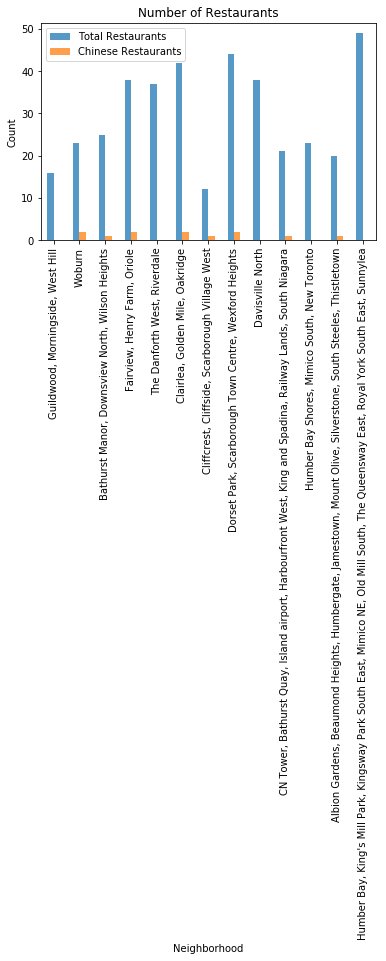

In [351]:
%matplotlib inline

ax = cluster.plot(x='Neighborhood',y=['Total Restaurants','Chinese Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')

Text(0, 0.5, 'Normalized Spending Power ($)')

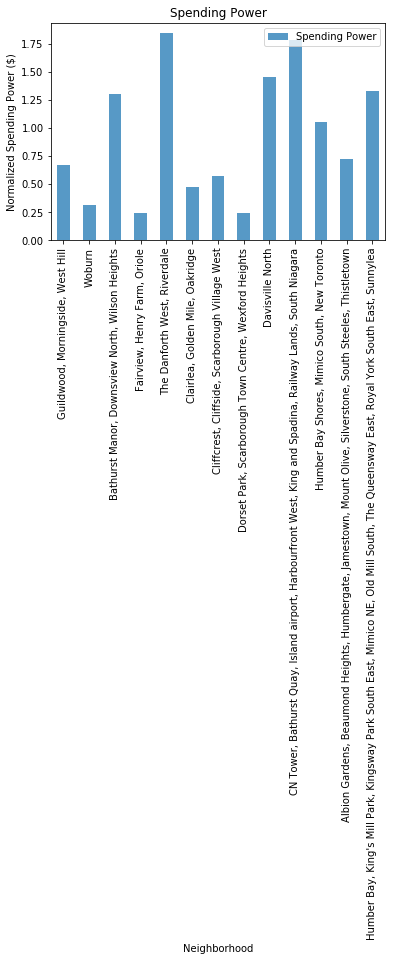

In [352]:
ax = cluster.plot(x='Neighborhood',y=['Spending Power'],kind='bar',alpha=0.75,title='Spending Power')
ax.set_ylabel('Normalized Spending Power ($)')

Text(0, 0.5, 'Population')

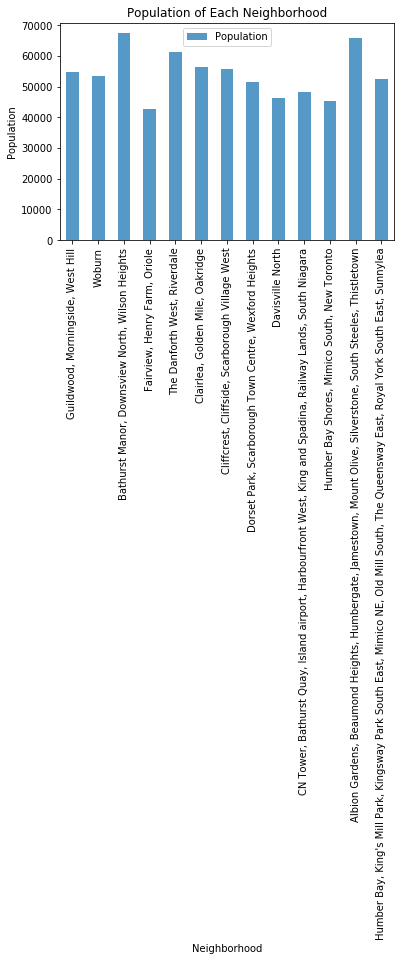

In [353]:
ax = cluster.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood')
ax.set_ylabel('Population')

Text(0, 0.5, 'Population (%)')

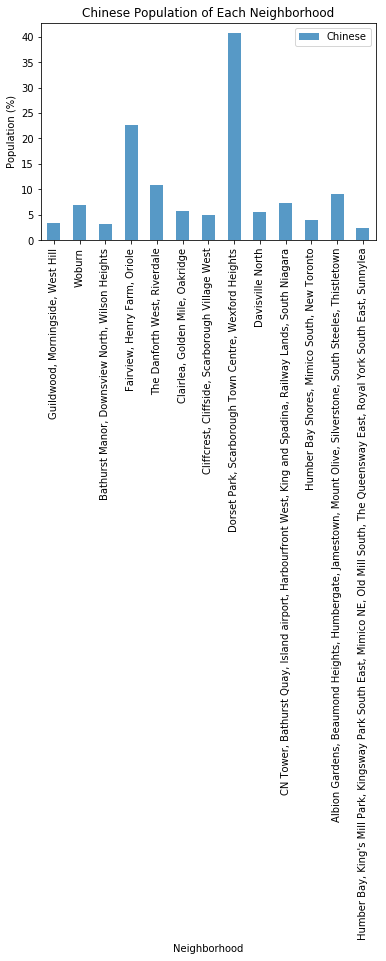

In [354]:
ax = cluster.plot(x='Neighborhood',y=['Chinese'],kind='bar',alpha=0.75,title='Chinese Population of Each Neighborhood')
ax.set_ylabel('Population (%)')

In [355]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster['Latitude'], cluster['Longitude'], cluster['Neighborhood'], cluster['Cluster Labels'],cluster['Total Restaurants'],cluster['Chinese Restaurants'],cluster['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nChinese Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters